# Task 3: Evaluating the Model

Choose an evaluation metric fitting to your model and explain why you have chosen this and share your scores for this metric.

---

In this assessment we have considered AUC (Area Under the ROC Curve) since we are interested in properly ranking the probabilites of the labelled data (regardless of the threshold). 

The ROC curve is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.”

In [1]:
import pickle
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# load model from file
xgb = pickle.load(open("xgb.pickle.dat", "rb"))

In [3]:
# load data
df = pd.read_csv('./data/Courier_data_model.csv')

In [4]:
# load predictors
f = open("predictors.txt", "r") 
predictors = f.read()
predictors = predictors[:-1].split('\n')

In [5]:
flag = 'flag'

In [6]:
df_train = df[df['train']==1]
df_test = df[df['train']==0]

In [7]:
X_train = df_train[predictors]; y_train = df_train[flag]
X_test = df_test[predictors]; y_test = df_test[flag]

pred_train = xgb.predict_proba(X_train)[:, 1]
pred_test= xgb.predict_proba(X_test)[:, 1]

In [8]:
print("AUC (Train) : %.4g" % metrics.roc_auc_score(y_train, pred_train))
print("AUC (Test)  : %.4g" % metrics.roc_auc_score(y_test, pred_test))

AUC (Train) : 0.9996
AUC (Test)  : 0.8585


In [9]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Compute ROC curve and ROC area
fpr["train"], tpr["train"], _ = metrics.roc_curve(y_train.ravel(), pred_train.ravel())
roc_auc["train"] = metrics.auc(fpr["train"], tpr["train"])

fpr["test"], tpr["test"], _ = metrics.roc_curve(y_test.ravel(), pred_test.ravel())
roc_auc["test"] = metrics.auc(fpr["test"], tpr["test"])

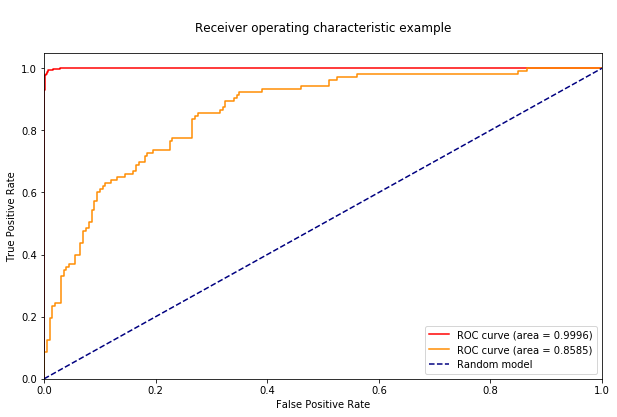

In [10]:
plt.figure(figsize=(10,6))
plt.plot(fpr["train"], tpr["train"], color='red',
         label='ROC curve (area = %0.4f)' % roc_auc["train"])
plt.plot(fpr["test"], tpr["test"], color='darkorange',
         label='ROC curve (area = %0.4f)' % roc_auc["test"])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--',
         label="Random model")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('\nReceiver operating characteristic example\n')
plt.legend(loc="lower right")
plt.show()

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [11]:
df_test_score = pd.DataFrame([y_test.values, pred_test]).transpose().rename(columns={0:'flag', 1:'pred'})
df_test_score.sort_values('pred').head()

,flag,pred
154,0.0,0.003700
125,0.0,0.004262
49,0.0,0.004677
72,0.0,0.005360
166,0.0,0.005610


In [12]:
df_test_score.sort_values('pred', ascending=False).head()

,flag,pred
248,1.0,0.988786
200,1.0,0.981751
222,1.0,0.980655
47,1.0,0.976394
9,1.0,0.970125
